# <center><h1 style="font-family: Times New Roman; color: black;">Decision Tree</h1></center>

# Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

# Tasks:
# 1. Data Preparation:
1. Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

# 2. Exploratory Data Analysis (EDA):
1. Perform exploratory data analysis to understand the structure of the dataset.
2. Check for missing values, outliers, and inconsistencies in the data.
3. Visualize the distribution of features, including histograms, box plots, and correlation matrices.

# 3. Feature Engineering:
1. If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

# 4. Decision Tree Classification:
1. Split the dataset into training and testing sets (e.g., using an 80-20 split).
2. Implement a Decision Tree Classification model using a library like scikit-learn.
3. Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

# 5. Hyperparameter Tuning:
1. Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

# 6. Model Evaluation and Analysis:
1. Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
2. Visualize the decision tree structure to understand the rules learned by the model and identify important features

# Solutions:

# 1. Data Preparation:

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:
# Load Dataset
df = pd.read_excel('heart_disease.xlsx')
df.head()

age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...

In [3]:
# This provides a quick overview of the dataset, including data types, 
# number of non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [4]:
# This will help us identify key statistics like mean, min, max, and quartiles for numerical data.
df.describe()

age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1

In [5]:
# This step helps us understand if there are any missing values that need to be addressed.
df.isnull().sum()

age             0
Age in years    0
dtype: int64

# 2. Exploratory Data Analysis (EDA):

In [7]:
# Reload the dataset, skipping the first few rows that contain metadata or descriptions
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease', skiprows=10)  # Adjust 'skiprows' based on the structure

# Display the first few rows to check if the data is correctly loaded
print(df.head())

   53    Male      non-anginal  155  175   True  st-t abnormality  160  False  \
0  30  Female   typical angina  170  237  False  st-t abnormality  170  False   
1  66  Female   typical angina  150  226  False            normal  114  False   
2  54    Male      non-anginal  125  273  False    lv hypertrophy  152  False   
3  53    Male      non-anginal  130  197   True    lv hypertrophy  152  False   
4  56    Male  atypical angina  120  240  False            normal  169  False   

   Unnamed: 9    upsloping  fixed defect  0.1  
0         0.0  downsloping  fixed defect    0  
1         2.6  downsloping        normal    0  
2         0.5  downsloping        normal    0  
3         1.2  downsloping        normal    0  
4         0.0  downsloping        normal    0  


In [8]:
# Reload the dataset using the correct header row
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease', header=0)  # Adjust 'header' based on the correct row

# Display the first few rows to verify the data and column names are correct
print(df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [9]:
# Check for missing values and data types in the dataset
missing_values = df.isnull().sum()
data_types = df.dtypes

# Display missing values and data types
print("Missing Values in Each Column:\n", missing_values)
print("\nData Types of Each Column:\n", data_types)

Missing Values in Each Column:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Data Types of Each Column:
 age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [10]:
# Convert numerical columns to numeric (if necessary)
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']  # Adjust based on actual data

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display a few rows to verify conversion
print(df[numerical_columns].head())

   age  trestbps  chol  thalch  oldpeak  num
0   63       145   233     150      2.3    0
1   41       135   203     132      0.0    0
2   57       140   192     148      0.4    0
3   52       118   186     190      0.0    0
4   57       110   201     126      1.5    0


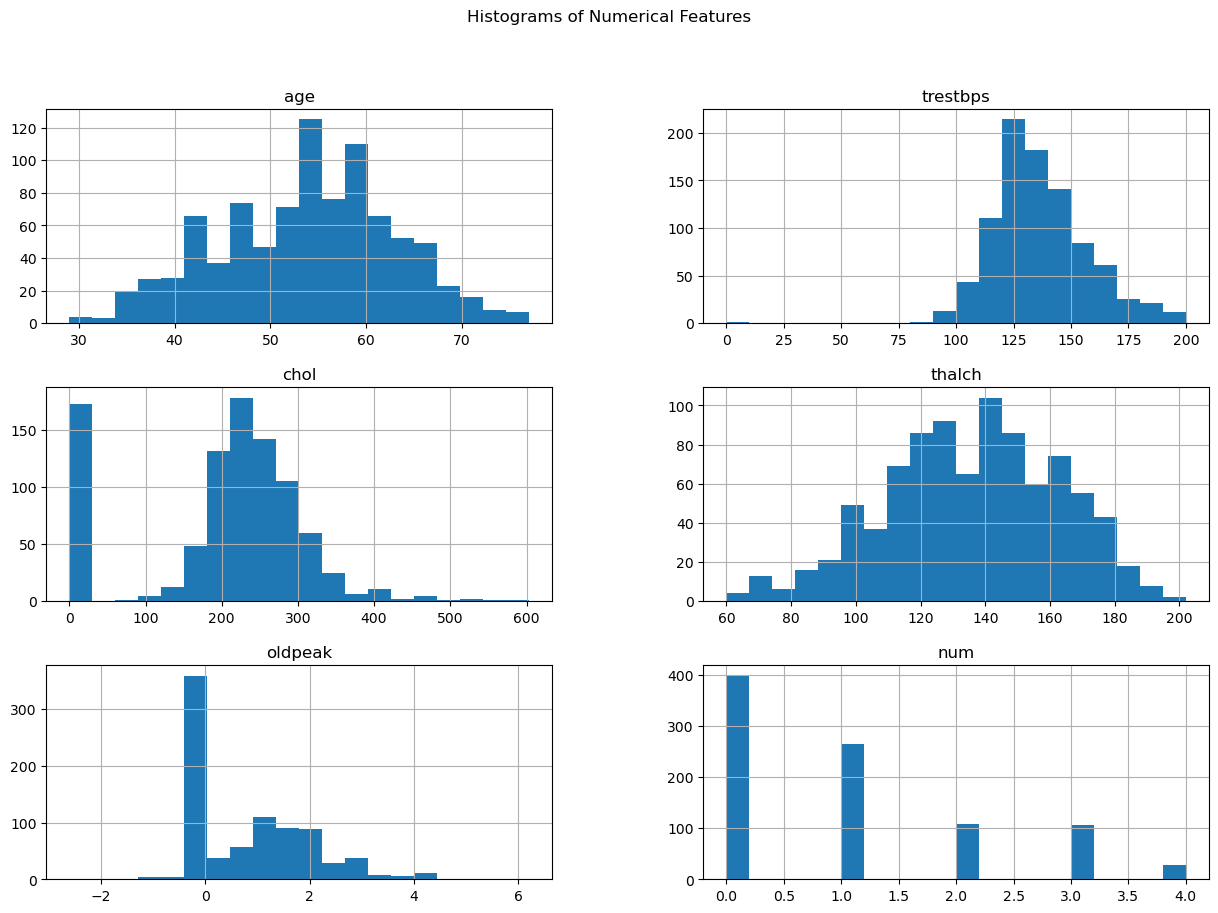

In [13]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Now you can run the plotting commands again
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

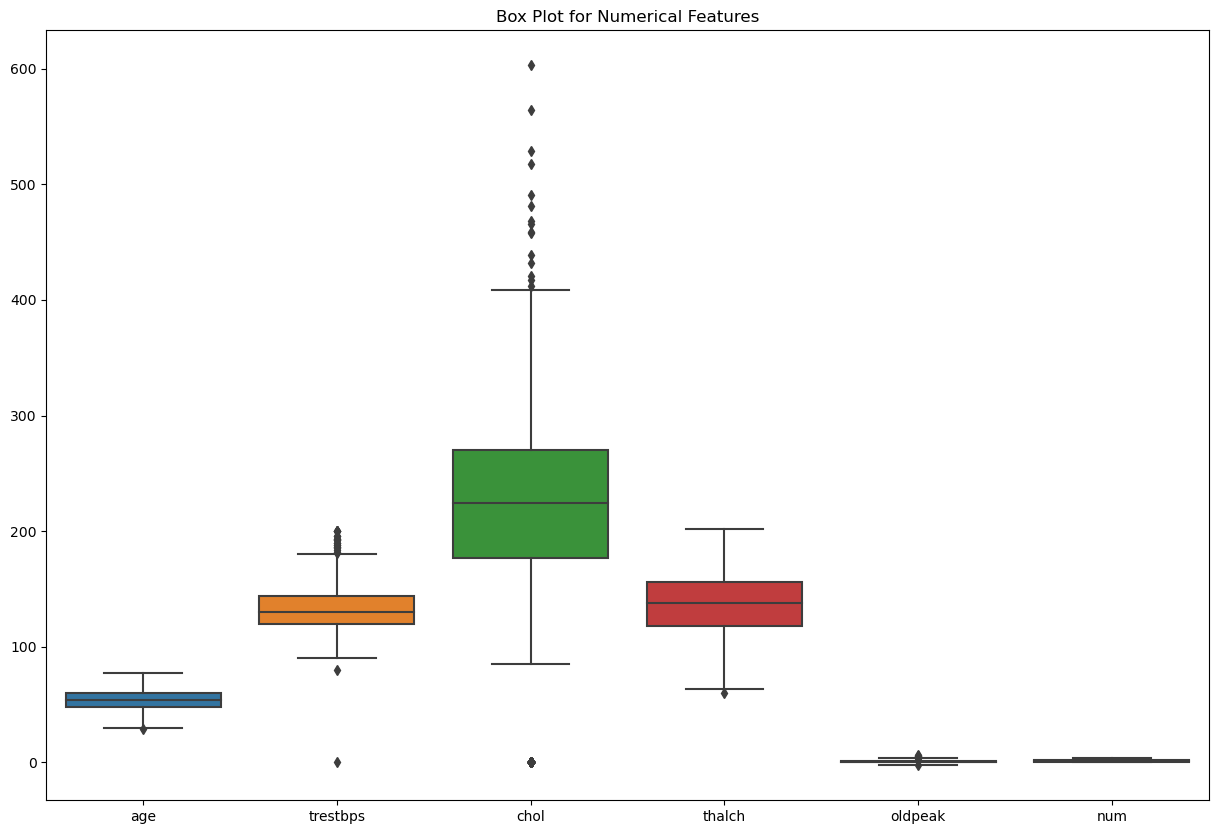

In [14]:
# Plot box plots for numerical features to detect outliers
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot for Numerical Features')
plt.show()

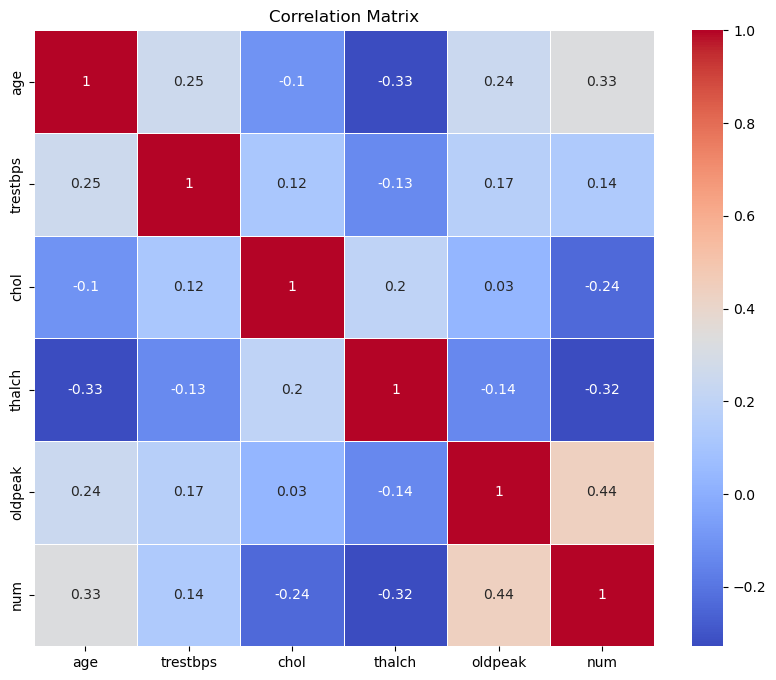

In [15]:
# Compute and visualize the correlation matrix for numerical features
correlation_matrix = df[numerical_columns].corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 3. Feature Engineering:

In [19]:
# Check for missing values and handle them
missing_values = df.isnull().sum()
print("Missing Values Before Handling:\n", missing_values)

# Fill missing numerical values with the mean value
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify if missing values are handled
missing_values_after = df.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

Missing Values Before Handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64
Missing Values After Handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [20]:
# 3.2 Import LabelEncoder to encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Define the list of categorical columns in your dataset
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

# Ensure that boolean values are converted to strings for consistency
for col in categorical_columns:
    df[col] = df[col].astype(str)  # Convert bool values to strings

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Display the first few rows after encoding
print("Dataset after encoding categorical variables:\n", df.head())

Dataset after encoding categorical variables:
    age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      1      2.3   
1   41    1   1       135   203  False        1     132      1      0.0   
2   57    1   0       140   192  False        1     148      1      0.4   
3   52    1   3       118   186  False        0     190      1      0.0   
4   57    1   0       110   201  False        1     126      3      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  


In [21]:
# 3.3 Import StandardScaler for scaling numerical features
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows after scaling
print("Dataset after scaling numerical features:\n", df.head())

Dataset after scaling numerical features:
         age  sex  cp  trestbps      chol    fbs  restecg    thalch  exang  \
0  1.006027    1   3  0.567394  0.281297   True        0  0.524183      1   
1 -1.397560    1   1  0.076967  0.013526  False        1 -0.147705      1   
2  0.350503    1   0  0.322181 -0.084656  False        1  0.449529      1   
3 -0.195767    1   3 -0.756760 -0.138211  False        0  2.017268      1   
4  0.350503    1   0 -1.149102 -0.004325  False        1 -0.371668      3   

    oldpeak  slope  thal  num  
0  1.334996      0     0    0  
1 -0.844594      1     0    0  
2 -0.465535      1     0    0  
3 -0.844594      1     0    0  
4  0.576878      1     0    0  


# 4. Decision Tree Classification:

In [22]:
# Import train_test_split to split the dataset
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (y)
X = df.drop('num', axis=1)  # Features
y = df['num']  # Target

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (726, 12)
Testing set shape: (182, 12)


In [23]:
# Import DecisionTreeClassifier and build the model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [24]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Compute and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5439560439560439
Precision: 0.5322855671917515
Recall: 0.5439560439560439
F1 Score: 0.5378380733363934
Confusion Matrix:
 [[68 15  4  2  0]
 [16 18  8  6  0]
 [ 3  3 10  5  1]
 [ 4  7  1  3  2]
 [ 0  4  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76        89
           1       0.38      0.38      0.38        48
           2       0.40      0.45      0.43        22
           3       0.19      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.34      0.35      0.35       182
weighted avg       0.53      0.54      0.54       182



In [25]:
# Check the unique classes in the target variable
print(y_train.unique())
print(y_test.unique())

[0 1 3 2 4]
[3 1 0 2 4]


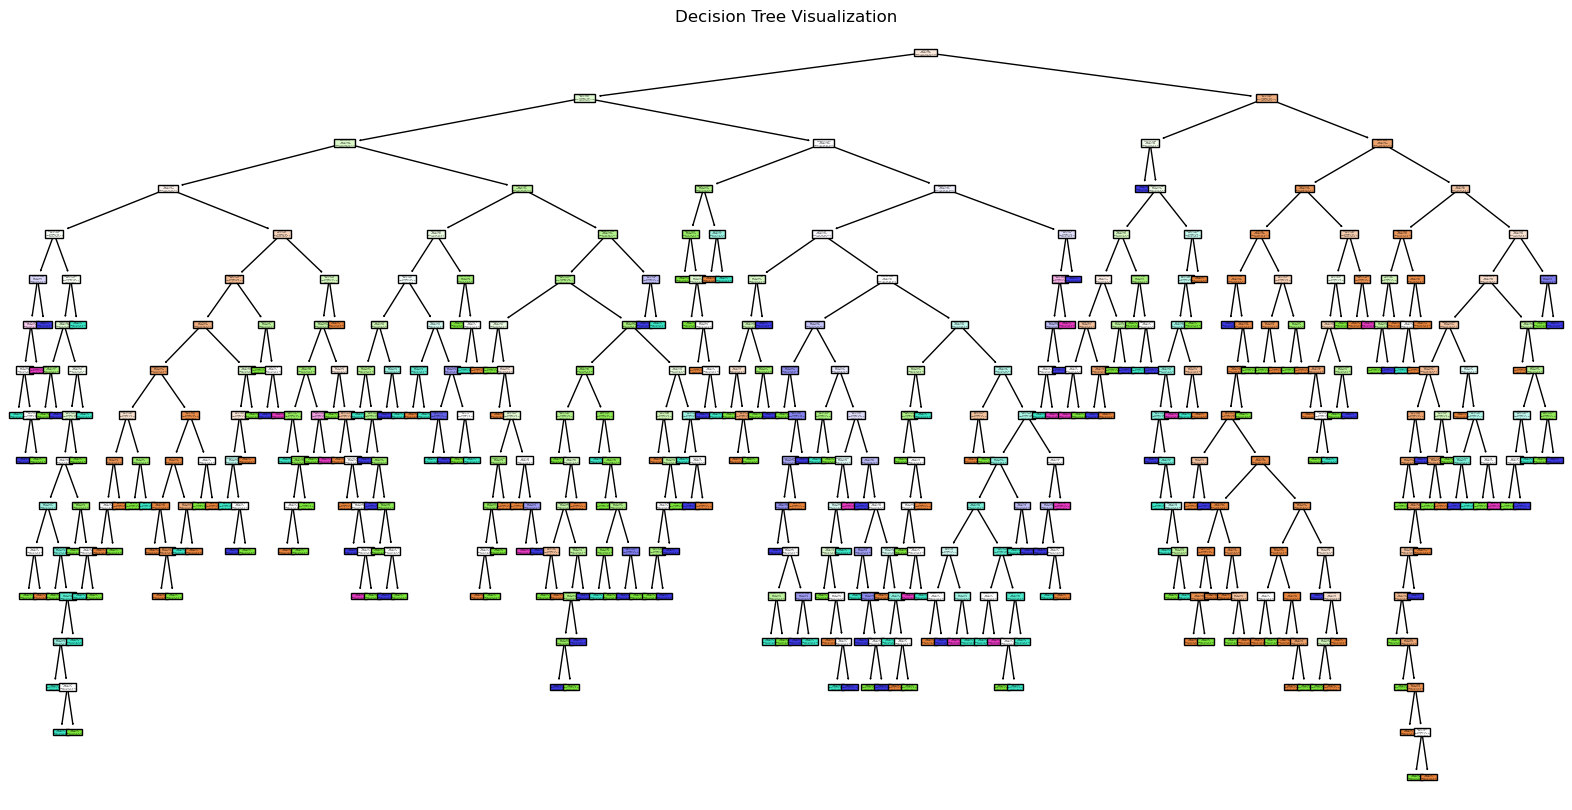

In [27]:
# Import plot_tree for decision tree visualization
from sklearn.tree import plot_tree

# Now you can plot the decision tree
plt.figure(figsize=(20, 10))

# Adjust the class names for the five classes in the dataset
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True)

plt.title('Decision Tree Visualization')
plt.show()

In [28]:
# Compute ROC-AUC score for multi-class classification
from sklearn.metrics import roc_auc_score

# ROC-AUC score
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.611674791486289


# 5. Hyperparameter Tuning:

In [30]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [31]:
# Initialize GridSearchCV with the Decision Tree Classifier and the parameter grid
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [33]:
# Evaluate the performance of the best model with zero_division to handle the warning
precision_best = precision_score(y_test, y_pred_best, average='weighted', zero_division=1)
recall_best = recall_score(y_test, y_pred_best, average='weighted', zero_division=1)
f1_best = f1_score(y_test, y_pred_best, average='weighted', zero_division=1)

print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model Precision: {precision_best}')
print(f'Best Model Recall: {recall_best}')
print(f'Best Model F1 Score: {f1_best}')

Best Model Accuracy: 0.5714285714285714
Best Model Precision: 0.6338754352246025
Best Model Recall: 0.5714285714285714
Best Model F1 Score: 0.521714462059831


# 6. Model Evaluation and Analysis:

In [36]:
# Display model performance metrics with zero_division parameter
print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_best}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# Classification report with zero_division to handle undefined metrics
print("Classification Report:\n", classification_report(y_test, y_pred_best, zero_division=1))

Accuracy: 0.5714285714285714
Precision: 0.6338754352246025
Recall: 0.5714285714285714
F1 Score: 0.521714462059831
Confusion Matrix:
 [[76 10  0  3  0]
 [19 24  0  5  0]
 [ 5 12  0  5  0]
 [ 5  8  0  4  0]
 [ 2  2  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       1.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       1.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.67      0.32      0.29       182
weighted avg       0.63      0.57      0.52       182



In [38]:
# Fit the Decision Tree model to the training data (if not done already)
best_model.fit(X_train, y_train)

# Now make predictions (if not done already)
y_pred_best = best_model.predict(X_test)

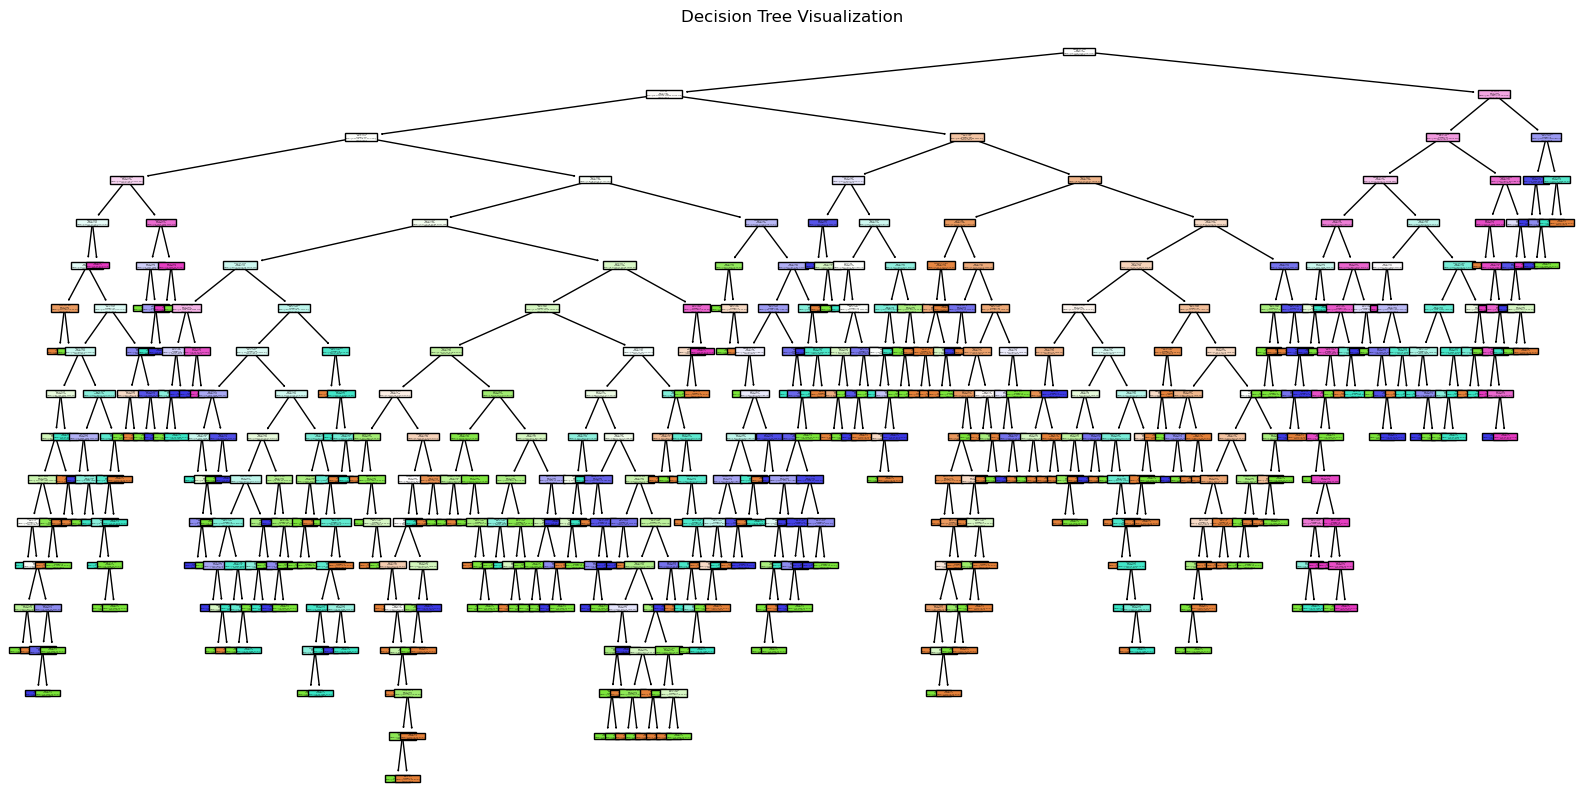

In [39]:
# Import plot_tree for decision tree visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))

# Plot the decision tree with the best model
plot_tree(best_model, feature_names=X.columns.tolist(), class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True)

plt.title('Decision Tree Visualization')
plt.show()

In [41]:
# Make sure the model is fitted before making predictions
y_pred_best = best_model.predict(X_test)

In [42]:
# Import necessary evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate the accuracy, precision, recall, and F1 score
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted', zero_division=1)
recall_best = recall_score(y_test, y_pred_best, average='weighted', zero_division=1)
f1_best = f1_score(y_test, y_pred_best, average='weighted', zero_division=1)

# Display the performance metrics
print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model Precision: {precision_best}')
print(f'Best Model Recall: {recall_best}')
print(f'Best Model F1 Score: {f1_best}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# Classification report for detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_best, zero_division=1))

Best Model Accuracy: 0.41208791208791207
Best Model Precision: 0.4082135812905044
Best Model Recall: 0.41208791208791207
Best Model F1 Score: 0.44248073765315143
Confusion Matrix:
 [[57 22  6  3  1]
 [23 12  9  4  0]
 [ 4 10  4  3  1]
 [ 5  5  4  2  1]
 [ 0  3  3  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        89
           1       0.23      0.25      0.24        48
           2       0.15      0.18      0.17        22
           3       0.17      0.12      0.14        17
           4       0.00      0.00      1.00         6

    accuracy                           0.41       182
   macro avg       0.24      0.24      0.44       182
weighted avg       0.41      0.41      0.44       182



<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>